# Pandas

[Pandas](http://pandas.pydata.org/) is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of _tabular_ data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

A [recent analysis](https://stackoverflow.blog/2017/09/06/incredible-growth-python/) of questions from Stack Overflow showed that python is the fastest growing and most widely used programming language in the world (in developed countries).

![python growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/growth_major_languages-1-1024x878.png)

A [follow-up analysis](https://stackoverflow.blog/2017/09/14/python-growing-quickly/) showed that this growth is driven by the data science packages such as numpy, matplotlib, and especially pandas.

![pandas growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/related_tags_over_time-1-1024x1024.png)

The exponential growth of pandas is due to the fact that it _just works_. It saves you time and helps you do science more efficiently and effictively.

### Pandas capabilities (from the Pandas website):

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

In this lecture, we will go over the basic capabilities of Pandas. It is a very deep library, and you will need to dig into the [documentation](http://pandas.pydata.org/pandas-docs/stable/) for more advanced usage.

Pandas was created by [Wes McKinney](http://wesmckinney.com/). Many of the examples here are drawn from Wes McKinney's book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do), which includes a github repo of [code samples](https://github.com/wesm/pydata-book).

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [64]:
names = ['Ryan', 'Chiara', 'Johnny']
values = [35, 36, 1.8]
ages = pd.Series(values, index=names)
ages

Ryan      35.0
Chiara    36.0
Johnny     1.8
dtype: float64

Series have built in plotting methods.

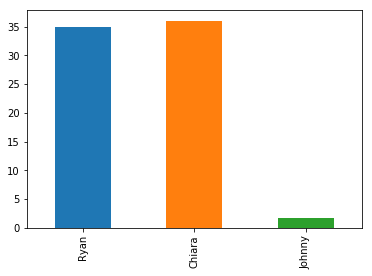

In [65]:
ages.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [66]:
np.log(ages) / ages**2

Ryan      0.002902
Chiara    0.002765
Johnny    0.181416
dtype: float64

We can access the underlying index object if we need to:

In [67]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [68]:
ages.loc['Johnny']

1.8

Or by raw position using `.iloc`

In [69]:
ages.iloc[2]

1.8

If we need to, we can always get the raw data back out as well

In [70]:
ages.values

array([35. , 36. ,  1.8])

In [71]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [72]:
# first we create a dictionary
data = {'age': [35, 36, 1.8],
        'height': [180, 155, 83],
        'weight': [72.5, np.nan, 11.3]}
df = pd.DataFrame(data, index=['Ryan', 'Chiara', 'Johnny'])
df

,age,height,weight
Ryan,35.0,180,72.5
Chiara,36.0,155,NaN
Johnny,1.8,83,11.3


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Ryan to Johnny
Data columns (total 3 columns):
age       3 non-null float64
height    3 non-null int64
weight    2 non-null float64
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [74]:
df.min()

age        1.8
height    83.0
weight    11.3
dtype: float64

In [75]:
df.mean()

age        24.266667
height    139.333333
weight     41.900000
dtype: float64

In [76]:
df.std()

age       19.463128
height    50.362023
weight    43.274935
dtype: float64

In [77]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.000000
mean,24.266667,139.333333,41.900000
std,19.463128,50.362023,43.274935
min,1.800000,83.000000,11.300000
25%,18.400000,119.000000,26.600000
50%,35.000000,155.000000,41.900000
75%,35.500000,167.500000,57.200000
max,36.000000,180.000000,72.500000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [78]:
df['height']

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

...or using attribute syntax.

In [79]:
df.height

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

New columns can easily be added to DataFrames

In [80]:
df['density'] = df.weight / df.height
df

,age,height,weight,density
Ryan,35.0,180,72.5,0.402778
Chiara,36.0,155,NaN,NaN
Johnny,1.8,83,11.3,0.136145


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [81]:
education = pd.Series(['PhD', 'PhD', None, 'masters'],
                     index=['Ryan', 'Chiara', 'Johnny', 'Takaya'],
                     name='education')
# returns a new DataFrame
df.join(education)

,age,height,weight,density,education
Ryan,35.0,180,72.5,0.402778,PhD
Chiara,36.0,155,NaN,NaN,PhD
Johnny,1.8,83,11.3,0.136145,None


In [82]:
# returns a new DataFrame
df.join(education, how='right')

,age,height,weight,density,education
Ryan,35.0,180.0,72.5,0.402778,PhD
Chiara,36.0,155.0,NaN,NaN,PhD
Johnny,1.8,83.0,11.3,0.136145,None
Takaya,NaN,NaN,NaN,NaN,masters


In [83]:
# returns a new DataFrame
df.reindex(['Ryan', 'Chiara', 'Johnny', 'Takaya', 'Kerry'])

,age,height,weight,density
Ryan,35.0,180.0,72.5,0.402778
Chiara,36.0,155.0,NaN,NaN
Johnny,1.8,83.0,11.3,0.136145
Takaya,NaN,NaN,NaN,NaN
Kerry,NaN,NaN,NaN,NaN


We can also index using a boolean series. This is very useful

In [84]:
adults = df[df.age > 18]
adults

,age,height,weight,density
Ryan,35.0,180,72.5,0.402778
Chiara,36.0,155,NaN,NaN


In [85]:
df['is_adult'] = df.age > 18
df

,age,height,weight,density,is_adult
Ryan,35.0,180,72.5,0.402778,True
Chiara,36.0,155,NaN,NaN,True
Johnny,1.8,83,11.3,0.136145,False


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

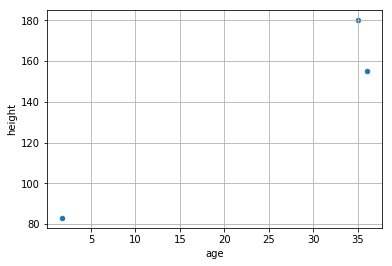

In [86]:
df.plot(kind='scatter', x='age', y='height', grid=True)

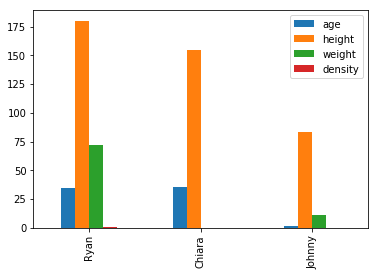

In [87]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

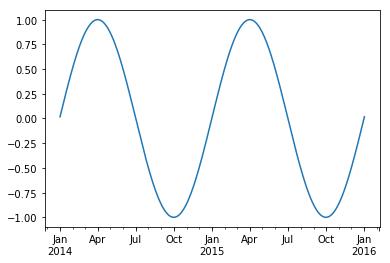

In [88]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

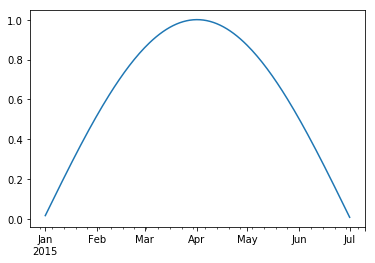

In [89]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

## Stock Market Data

* oops - Ryan's links don't work, so we will use static files

Now we read some stock market data from Google finance. I have created direct links to Google and Apple stock price data.

In [90]:
#!curl -L -o goog.csv http://tinyurl.com/rces-goog
#!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv
! cp /home/pangeo/notebooks/GOOGL.csv goog.csv
! cp /home/pangeo/notebooks/AAPL.csv aapl.csv

In [91]:
! head goog.csv

Date,Open,High,Low,Close,Adj Close,Volume
2006-01-03,211.471466,218.053055,209.319321,217.832840,217.832840,26216100
2006-01-04,222.172165,224.704712,220.095093,222.842850,222.842850,30542200
2006-01-05,223.223221,226.001007,220.970978,225.845840,225.845840,21594900
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478200
2006-01-09,233.438446,236.936935,230.700699,233.683685,233.683685,25558200
2006-01-10,232.442444,235.360367,231.251251,235.115112,235.115112,18176000
2006-01-11,235.870865,237.792786,234.824829,236.051056,236.051056,17996700
2006-01-12,237.097092,237.732727,230.980988,232.047043,232.047043,20230300
2006-01-13,232.387390,233.678680,231.036041,233.358353,233.358353,15297800


We can see that this is well-formated, tidy CSV data, ready for immediate ingestion into Pandas.
We use Pandas' amazing [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function to do this.

In [92]:
goog = pd.read_csv('goog.csv')
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,211.471466,218.053055,209.319321,217.832840,217.832840,26216100
1,2006-01-04,222.172165,224.704712,220.095093,222.842850,222.842850,30542200
2,2006-01-05,223.223221,226.001007,220.970978,225.845840,225.845840,21594900
3,2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478200
4,2006-01-09,233.438446,236.936935,230.700699,233.683685,233.683685,25558200


Not bad! But we can do better by giving read_csv some hints.

In [93]:
goog = pd.read_csv('goog.csv', parse_dates=[0], index_col=0)
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,211.471466,218.053055,209.319321,217.832840,217.832840,26216100
2006-01-04,222.172165,224.704712,220.095093,222.842850,222.842850,30542200
2006-01-05,223.223221,226.001007,220.970978,225.845840,225.845840,21594900
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478200
2006-01-09,233.438446,236.936935,230.700699,233.683685,233.683685,25558200


In [94]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3091 entries, 2006-01-03 to 2018-04-13
Data columns (total 6 columns):
Open         3091 non-null float64
High         3091 non-null float64
Low          3091 non-null float64
Close        3091 non-null float64
Adj Close    3091 non-null float64
Volume       3091 non-null int64
dtypes: float64(5), int64(1)
memory usage: 169.0 KB


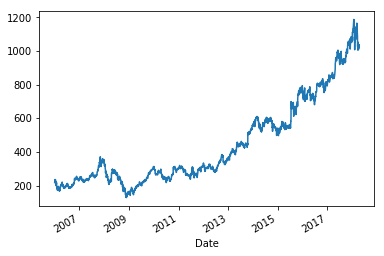

In [95]:
goog.Close.plot()

In [96]:
aapl = pd.read_csv('aapl.csv', parse_dates=[0], index_col=0)
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3091 entries, 2006-01-03 to 2018-04-13
Data columns (total 6 columns):
Open         3091 non-null float64
High         3091 non-null float64
Low          3091 non-null float64
Close        3091 non-null float64
Adj Close    3091 non-null float64
Volume       3091 non-null int64
dtypes: float64(5), int64(1)
memory usage: 169.0 KB


In [97]:
aapl_close = aapl.Close.rename('aapl')
goog_close = goog.Close.rename('goog')
stocks = pd.concat([aapl_close, goog_close], axis=1)
stocks.head()

,aapl,goog
Date,,
2006-01-03,10.678572,217.832840
2006-01-04,10.710000,222.842850
2006-01-05,10.625714,225.845840
2006-01-06,10.900000,233.063065
2006-01-09,10.864285,233.683685


In [103]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3091 entries, 2006-01-03 to 2018-04-13
Data columns (total 2 columns):
aapl    3091 non-null float64
goog    3091 non-null float64
dtypes: float64(2)
memory usage: 72.4 KB


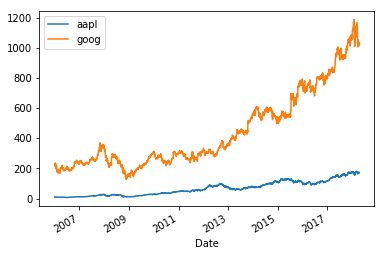

In [98]:
stocks.plot()

Pandas knows how to take correlations. And [tons of other computations](https://pandas.pydata.org/pandas-docs/stable/computation.html).

In [99]:
stocks.corr()

,aapl,goog
aapl,1.000000,0.922954
goog,0.922954,1.000000


Because it understands times, it can do really cool stuff like resampling.

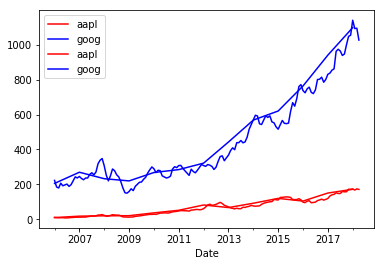

In [101]:
# resample by taking the mean over each month

fig, ax = plt.subplots()
stocks.resample('MS').mean().plot(ax=ax, color=['r', 'b'])
# and each year
stocks.resample('AS').mean().plot(ax=ax, color=['r', 'b'])

The string `MS` means "month start. The string `AS` mean "year start". There is a long list of possible [frequency aliases](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases).

We can also apply other reduction operations with resample. These are described in the [resample docs](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling).

In [ ]:
# get resample object
rs = stocks.goog.resample('MS')
# standard deviation of each month
rs.std().plot()

## Temperature Data

We download some timeseries data from the [Berkeley Earth(http://berkeleyearth.org/) surface temperature dataset. This is timeseries data from various locations around earth. Let's get our local temperatures.

In [ ]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt

If we examine this data, we see it is NOT a well formated CSV file. Loading it will be a bit painful, but Pandas makes the job retatively easy.

In [ ]:
! head -72 nyc_temp.txt | tail -8

In [ ]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] + 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

In [ ]:
# need a day
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

In [ ]:
temp.plot()

In [ ]:
fig, ax = plt.subplots()
temp.plot(ax=ax)
temp.resample('AS').mean().plot(ax=ax)
temp.resample('10AS').mean().plot(ax=ax)

Pandas can do both time-based resampling and operation over fixed-length rolling windows. These are very similar but distinct; see [discussion in Pandas docs](https://pandas.pydata.org/pandas-docs/stable/computation.html#time-aware-rolling-vs-resampling).

In [ ]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot()

To create a "climatology" (i.e. the average of all same months), we can use Pandas' [groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html) functionality.

In [ ]:
# diurnal cycle has been removed!
temp.groupby(temp.index.month).mean().plot()

In [ ]:
# find the hottest years
temp.groupby(temp.index.year).mean().sort_values('monthly_anom', ascending=False).head(10)

## Groupby

Now we will explore groupby's capabilities more in a public dataset from the City of New York: the [Rat Information Portal](The Rat Information Portal)!

In [ ]:
# https://data.cityofnewyork.us/Health/Rats/amyk-xiv9
rats = pd.read_csv('https://data.cityofnewyork.us/api/views/amyk-xiv9/rows.csv',
                  parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [ ]:
rats.info()

In [ ]:
rats.head()

Let's do some grouping to explore the data.

In [ ]:
rats.groupby('INSPECTION_TYPE')['INSPECTION_TYPE'].count()

In [ ]:
rats.groupby('BORO_CODE')['BORO_CODE'].count().head()

In [ ]:
rats.groupby('STREET_NAME')['STREET_NAME'].count().head(20)

This dataset clearly needs some cleaning. We can Pandas' [text features](https://pandas.pydata.org/pandas-docs/stable/text.html) to strip the whitespace out of the data.

In [ ]:
# clean up street name
street_names_cleaned = rats.STREET_NAME.str.strip()
street_names_cleaned.groupby(street_names_cleaned).count().head(20)

In [ ]:
count = street_names_cleaned.groupby(street_names_cleaned).count()
count.sort_values(ascending=False).head(20)

To get a better idea of the geography, let's plot the locations of the inspections. But first let's look at the statistics.

In [ ]:
rats[['LATITUDE', 'LONGITUDE']].describe()

There are clearly some weird outliers in the location data. We need to strip these out before plotting.

In [ ]:
valid_latlon = rats[(rats.LATITUDE > 30) & (rats.LONGITUDE < -70)]
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', C='BORO_CODE', cmap='Set1')

In [ ]:
# https://github.com/pandas-dev/pandas/issues/10678
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False)

In [ ]:
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

In [ ]:
manhattan_rats = valid_latlon[valid_latlon.BORO_CODE==1]
manhattan_rats.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')

In [ ]:
inspection_date = pd.DatetimeIndex(rats.INSPECTION_DATE)

fig, ax = plt.subplots()
rats.groupby(inspection_date.weekday)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('weekday');

In [ ]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.hour)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('hour');

In [ ]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.month)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('month')